In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar
from math import factorial

In [7]:
def Hermitian(N, X):
    if N == 0:
        return 1
    Hn = np.zeros(N+1)
    if isinstance(X, int):
        Hn[0] = 1
        Hn[1] = 2*X
        if N == 1:
            return Hn[1] 
        for i in range(2,len(Hn)):
            Hn[i] = 2*X*Hn[i-1]-2*(i-1)*Hn[i-2]
        return Hn[-1]
    else:
        HN = []
        for x in X:
            Hn[0] = 1
            Hn[1] = 2*x
            if N == 1:
                return Hn[1] 
            for i in range(2,len(Hn)):
                Hn[i] = 2*x*Hn[i-1]-2*(i-1)*Hn[i-2]
            HN.append(Hn[i])
        
    return HN

In [64]:
def numerow_step(psi_minus_1, psi, k_minus_1,  k, k_plus_1, h):
    h2 = h**2
    a = 2*(1 - (5/12)*(h2)*k)*psi
    b = (1 + (1/12)*(h2)*k_minus_1)*psi_minus_1
    c = (1 + (1/12)*(h2)*k_plus_1)
    return (a-b)/c


def Numerow(x0, xmax, N, epsilon):
    x_out = []
    y_out = []
    x1, stepsize = np.linspace(x0,xmax,N+1,retstep=True)
    K = 2*epsilon - x1**2
    k_minus_1 = K[1]
    k_minus_2 = K[0]
    k = K[2]
    psi_minus_2 = 1
    psi_minus_1 = psi[0]-(stepsize**2)*k*psi_minus_2
    y_out.append(psi_minus_2)
    y_out.append(psi_minus_1)
    
    for i, x in enumerate(x1):
        if i <= 1:
            pass
        else:
            y = numerow(k_minus_1, psi_minus_1, k_minus_2, psi_minus_2, k, h)

              # Save for plotting
            y_out.append(y)

          # Shift for next iteration
            psi_minus_2 = psi_minus_1
            psi_minus_1 = y
            k_minus_2 = k_minus_1
            k_minus_1 = k
            k = K[i]
    return x1, y_out

In [65]:
N = 60000 # iterations

h = 0.0001
values, x = Numerow(-6, 6, N, 2.5)

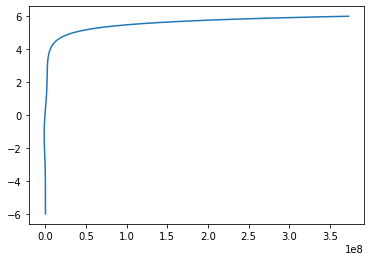

In [66]:
plt.plot(x, values)

In [15]:
def psi_ana(x0, xmax, N,n):
    x, stepsize = np.linspace(x0,xmax,N+1,retstep=True)
    return (Hermitian(n, x))/np.sqrt(factorial(2**n)*np.sqrt(np.pi))*np.e**(-(x**2)/2), x

In [16]:
psi_Ana, x = psi_ana(-10, 10, 1000, 6)

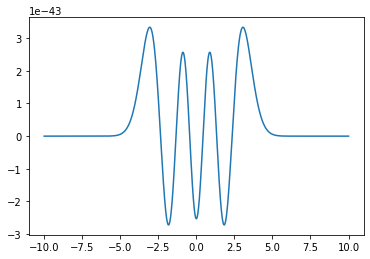

In [17]:
plt.plot(x, psi_Ana)

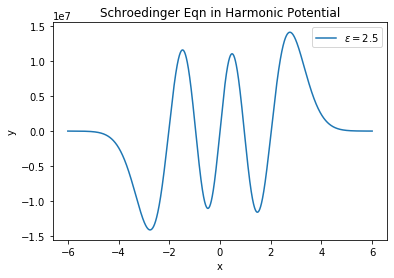

In [116]:
def numerow(k_minus_1, y_minus_1, k_minus_2, y_minus_2, k, h):
    return  ( 2*(1-5*(h**2/12)*k_minus_1) * y_minus_1 - (1+(h**2/12)*k_minus_2) * y_minus_2 ) / (1 + (h**2/12) * k)



def calc(xmin, xmax, steps, stepsize, n):
    epsilon = n+ 0.5
    x1 = np.linspace(xmin, xmax, steps)
    psi_minus_2 = 1 # y_0
    psi_minus_1 = 0 # y_1
    psi = []
    psi.append(psi_minus_2)
    psi.append(psi_minus_1)
    K = 2*epsilon - x1**2

    for i, x in enumerate(x1):
        if i <= 1:
            pass
        else:
            psi_n = numerow(K[i-1], psi[i-1], K[i-2], psi[i-2], K[i], h)

              # Save for plotting
            x_out.append(x)
            psi.append(psi_n)
    return x1, psi

N = 119996 # iterations

h = 0.0001

xmin = -5.9997 
xmax = 5.9997999999
x, y = calc(-5.9997 , 5.9997999999, 119996, h, 5)

# Plot
plt.figure(1)
plt.plot(x, y, label="$\epsilon = "+repr(epsilon)+"$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Schroedinger Eqn in Harmonic Potential")
plt.legend(loc=1)
